In [1]:
import numpy as np
import os

# Define the processed data directory
npy_file_path = "/home/martinvalentine/Desktop/CSLR-VSL/data/processed/VSL_V1_5/dev_info.npy"

# Load the NumPy dictionary
data = np.load(npy_file_path, allow_pickle=True).item()  # Convert to dictionary

print(f"\nLoaded Test Data (Showing 3 Samples)\n" + "="*50)

# Print only 3 entries, formatted nicely
for idx, (key, value) in enumerate(data.items()):
     print(f"Video ID: {value['fileid']}")
     print(f"Folder: {value['folder']}")
     print(f"Signer: {value['signer']}")
     print(f"Gloss: {value['label']}")
     print(f"Frames: {value['num_frames']}")
     print(f"Info: {value['original_info']}")
     print("-" * 50)
     if idx == 3:  # Show only 3 entries
          break


Loaded Test Data (Showing 3 Samples)
Video ID: Signer4_Bạn-khoẻ_19
Folder: dev/Signer4_Bạn-khoẻ_19/*.*
Signer: signer4
Gloss: bạn khoẻ
Frames: 107
Info: Signer4_Bạn-khoẻ_19|107|Bạn-khoẻ
--------------------------------------------------
Video ID: Signer4_Bạn-khoẻ_20
Folder: dev/Signer4_Bạn-khoẻ_20/*.*
Signer: signer4
Gloss: bạn khoẻ
Frames: 108
Info: Signer4_Bạn-khoẻ_20|108|Bạn-khoẻ
--------------------------------------------------
Video ID: Signer4_Bạn-khoẻ_4
Folder: dev/Signer4_Bạn-khoẻ_4/*.*
Signer: signer4
Gloss: bạn khoẻ
Frames: 119
Info: Signer4_Bạn-khoẻ_4|119|Bạn-khoẻ
--------------------------------------------------
Video ID: Signer4_Bạn-khoẻ_9
Folder: dev/Signer4_Bạn-khoẻ_9/*.*
Signer: signer4
Gloss: bạn khoẻ
Frames: 118
Info: Signer4_Bạn-khoẻ_9|118|Bạn-khoẻ
--------------------------------------------------


In [4]:
data

{0: {'fileid': 'Signer3_Bạn-khoẻ_12',
  'folder': 'dev/Signer3_Bạn-khoẻ_12/*.jpg',
  'signer': 'signer3',
  'label': 'bạn khoẻ',
  'num_frames': 100,
  'original_info': 'Signer3_Bạn-khoẻ_12|100|Bạn-khoẻ'},
 1: {'fileid': 'Signer3_Bạn-khoẻ_13',
  'folder': 'dev/Signer3_Bạn-khoẻ_13/*.jpg',
  'signer': 'signer3',
  'label': 'bạn khoẻ',
  'num_frames': 102,
  'original_info': 'Signer3_Bạn-khoẻ_13|102|Bạn-khoẻ'},
 2: {'fileid': 'Signer3_Bạn-mệt_12',
  'folder': 'dev/Signer3_Bạn-mệt_12/*.jpg',
  'signer': 'signer3',
  'label': 'bạn mệt',
  'num_frames': 111,
  'original_info': 'Signer3_Bạn-mệt_12|111|Bạn-mệt'},
 3: {'fileid': 'Signer3_Bạn-mệt_13',
  'folder': 'dev/Signer3_Bạn-mệt_13/*.jpg',
  'signer': 'signer3',
  'label': 'bạn mệt',
  'num_frames': 103,
  'original_info': 'Signer3_Bạn-mệt_13|103|Bạn-mệt'},
 4: {'fileid': 'Signer3_Bạn-tên_12',
  'folder': 'dev/Signer3_Bạn-tên_12/*.jpg',
  'signer': 'signer3',
  'label': 'bạn tên',
  'num_frames': 81,
  'original_info': 'Signer3_Bạn-tên_12|8

In [2]:
import numpy as np

# Define the processed data directory
npy_file_path = "/home/martinvalentine/Desktop/CSLR-VSL/data/processed/VSL_V1_5/gloss_dict.npy"

# Load the NumPy dictionary
gloss_dict = np.load(npy_file_path, allow_pickle=True).item()  # Convert to dictionary

# Print dictionary in a more readable format
print("\nLoaded Gloss Dictionary\n" + "="*50)
for key, value in gloss_dict.items():
    print(f"Gloss ID: {key} ➝ Gloss Label: {value}")
print("="*50)



Loaded Gloss Dictionary
Gloss ID: bạn ➝ Gloss Label: [1, 325]
Gloss ID: khoẻ ➝ Gloss Label: [2, 130]
Gloss ID: mệt ➝ Gloss Label: [3, 130]
Gloss ID: thích ➝ Gloss Label: [4, 130]
Gloss ID: tên ➝ Gloss Label: [5, 130]
Gloss ID: tôi ➝ Gloss Label: [6, 325]
Gloss ID: đói ➝ Gloss Label: [7, 130]
Gloss ID: đọc_sách ➝ Gloss Label: [8, 130]


In [3]:
len(gloss_dict)

8

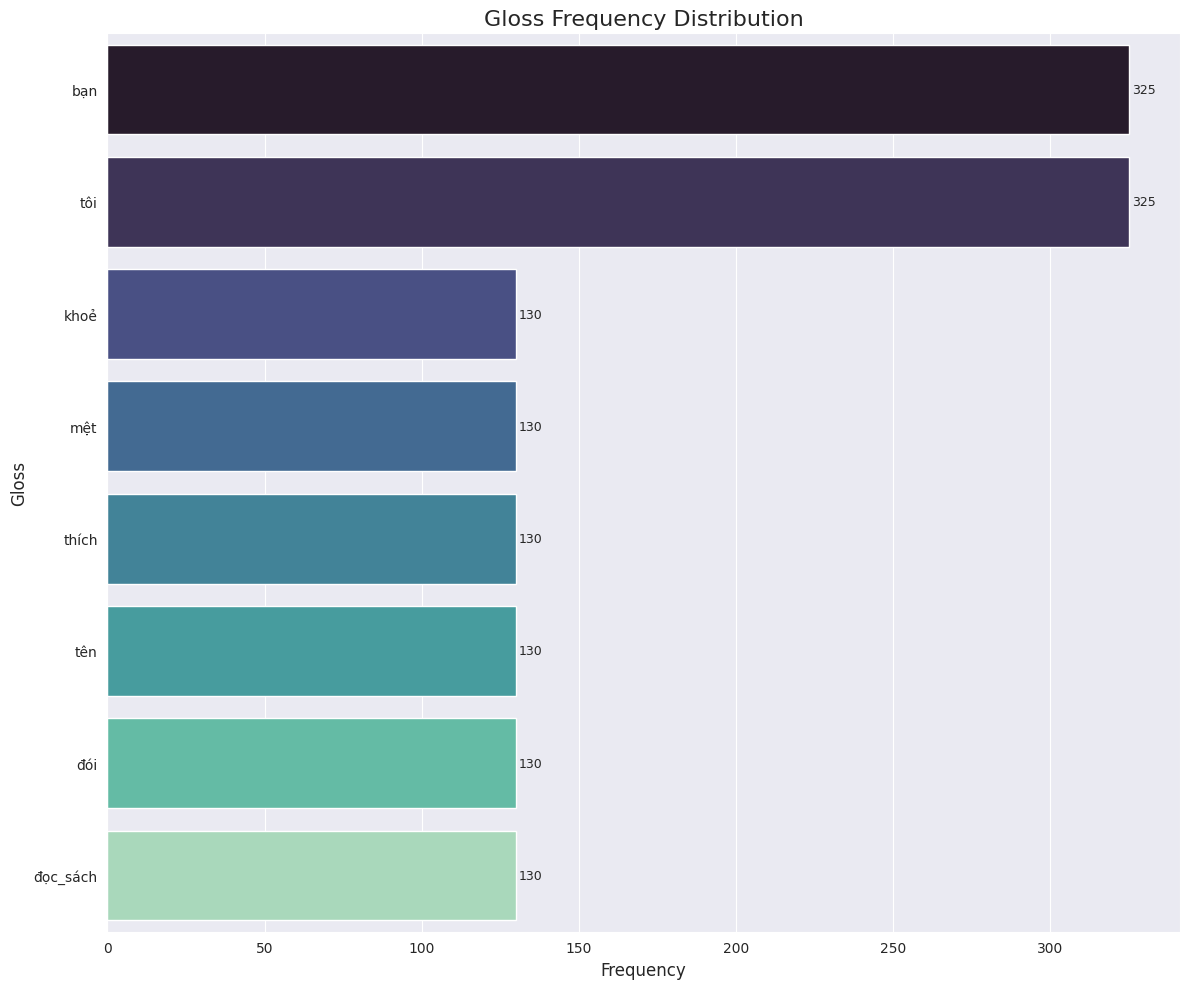

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Load gloss dictionary
npy_file_path = "/home/martinvalentine/Desktop/CSLR-VSL/data/processed/VSL_V1_5/gloss_dict.npy"
gloss_dict = np.load(npy_file_path, allow_pickle=True).item()  # Convert to dictionary

# Extract gloss names and frequencies
glosses = list(gloss_dict.keys())
frequencies = [v[1] for v in gloss_dict.values()]

# Create DataFrame
df = pd.DataFrame({
    "Gloss": glosses,
    "Frequency": frequencies
}).sort_values(by="Frequency", ascending=False)

# Plot
plt.figure(figsize=(12, 10))
ax = sns.barplot(data=df, y="Gloss", x="Frequency", hue="Gloss", palette="mako", legend=False)

# Add frequency number at the end of each bar
for i, (freq, gloss) in enumerate(zip(df["Frequency"], df["Gloss"])):
    ax.text(freq + 1, i, str(freq), va='center', fontsize=9)

plt.title("Gloss Frequency Distribution", fontsize=16)
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Gloss", fontsize=12)
plt.tight_layout()
plt.show()

In [8]:
import torch
x = torch.rand(5, 3)
print(x)

torch.cuda.is_available()


tensor([[0.4425, 0.8732, 0.4179],
        [0.4740, 0.6315, 0.8739],
        [0.0015, 0.2923, 0.2432],
        [0.6299, 0.1482, 0.9046],
        [0.7529, 0.4329, 0.4726]])


True

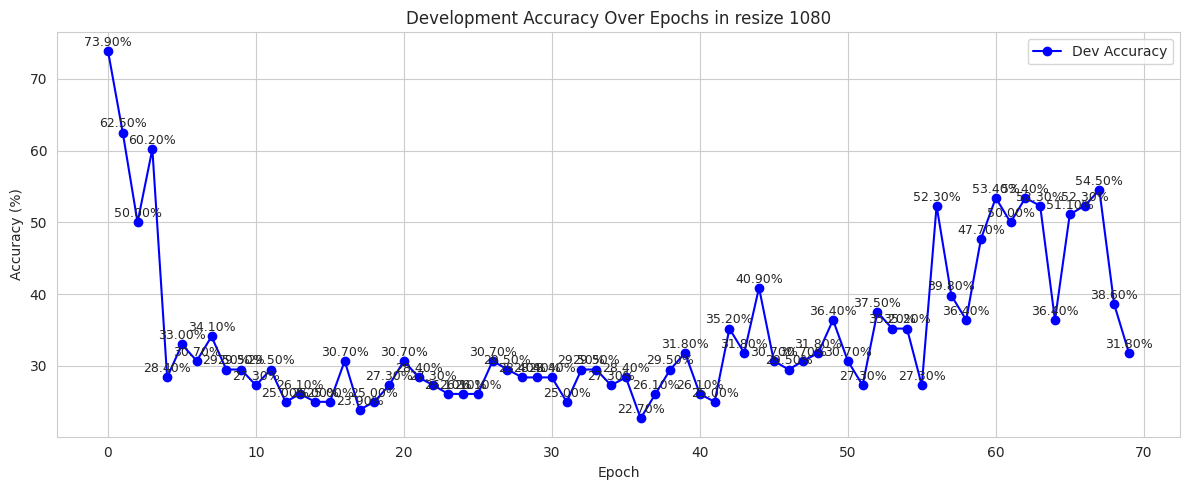

In [81]:
import re
import matplotlib.pyplot as plt

# Path to your log file
log_path = "/home/martinvalentine/Desktop/CSLR-VSL/outputs/logs/baseline_res18_resize_1080/dev.txt"

# Lists to store epoch numbers and accuracy values
epochs = []
accuracies = []

# Read and parse the file
with open(log_path, 'r') as f:
    for line in f:
        match = re.search(r"Epoch (\d+), dev\s+([\d.]+)%", line)
        if match:
            epoch = int(match.group(1))
            acc = float(match.group(2))
            epochs.append(epoch)
            accuracies.append(acc)

# Plotting
plt.figure(figsize=(12, 5))
plt.plot(epochs, accuracies, marker='o', linestyle='-', color='b', label='Dev Accuracy')

# Annotate each point with its value
for epoch, acc in zip(epochs, accuracies):
    plt.text(epoch, acc + 0.3, f"{acc:.2f}%", ha='center', va='bottom', fontsize=9)

plt.title("Development Accuracy Over Epochs in resize 1080")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


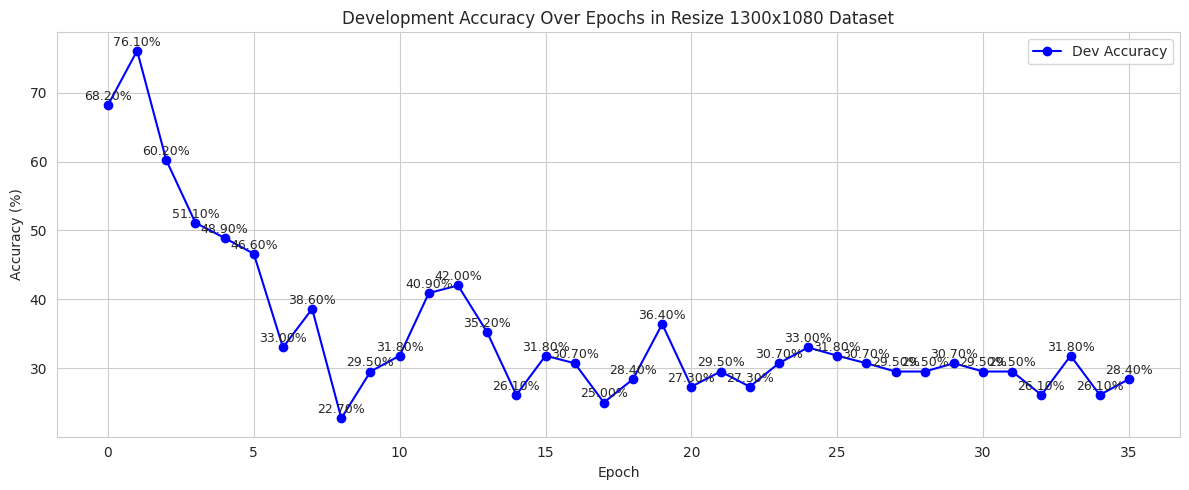

In [87]:
import re
import matplotlib.pyplot as plt

# Path to your log file
log_path = "/home/martinvalentine/Desktop/CSLR-VSL/outputs/logs/baseline_res18_resize_1300/dev.txt"

# Lists to store epoch numbers and accuracy values
epochs = []
accuracies = []

# Read and parse the file
with open(log_path, 'r') as f:
    for line in f:
        match = re.search(r"Epoch (\d+), dev\s+([\d.]+)%", line)
        if match:
            epoch = int(match.group(1))
            acc = float(match.group(2))
            epochs.append(epoch)
            accuracies.append(acc)

# Plotting
plt.figure(figsize=(12, 5))
plt.plot(epochs, accuracies, marker='o', linestyle='-', color='b', label='Dev Accuracy')

# Annotate each point with its value
for epoch, acc in zip(epochs, accuracies):
    plt.text(epoch, acc + 0.3, f"{acc:.2f}%", ha='center', va='bottom', fontsize=9)

plt.title("Development Accuracy Over Epochs in Resize 1300x1080 Dataset")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


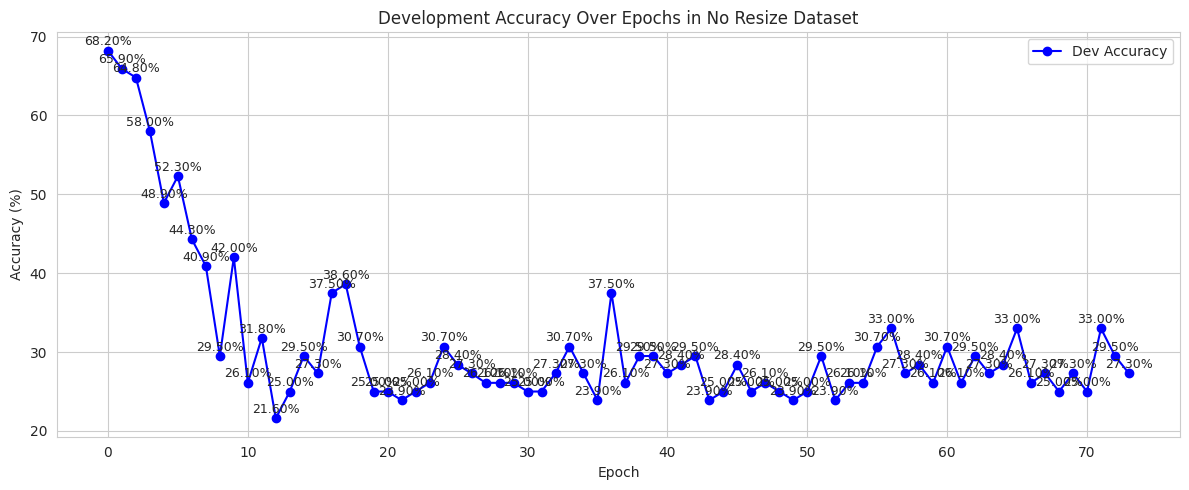

In [85]:
import re
import matplotlib.pyplot as plt

# Path to your log file
log_path = "/home/martinvalentine/Desktop/CSLR-VSL/outputs/logs/baseline_res18_no_resize/dev.txt"

# Lists to store epoch numbers and accuracy values
epochs = []
accuracies = []

# Read and parse the file
with open(log_path, 'r') as f:
    for line in f:
        match = re.search(r"Epoch (\d+), dev\s+([\d.]+)%", line)
        if match:
            epoch = int(match.group(1))
            acc = float(match.group(2))
            epochs.append(epoch)
            accuracies.append(acc)

# Plotting
plt.figure(figsize=(12, 5))
plt.plot(epochs, accuracies, marker='o', linestyle='-', color='b', label='Dev Accuracy')

# Annotate each point with its value
for epoch, acc in zip(epochs, accuracies):
    plt.text(epoch, acc + 0.3, f"{acc:.2f}%", ha='center', va='bottom', fontsize=9)

plt.title("Development Accuracy Over Epochs in No Resize Dataset")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


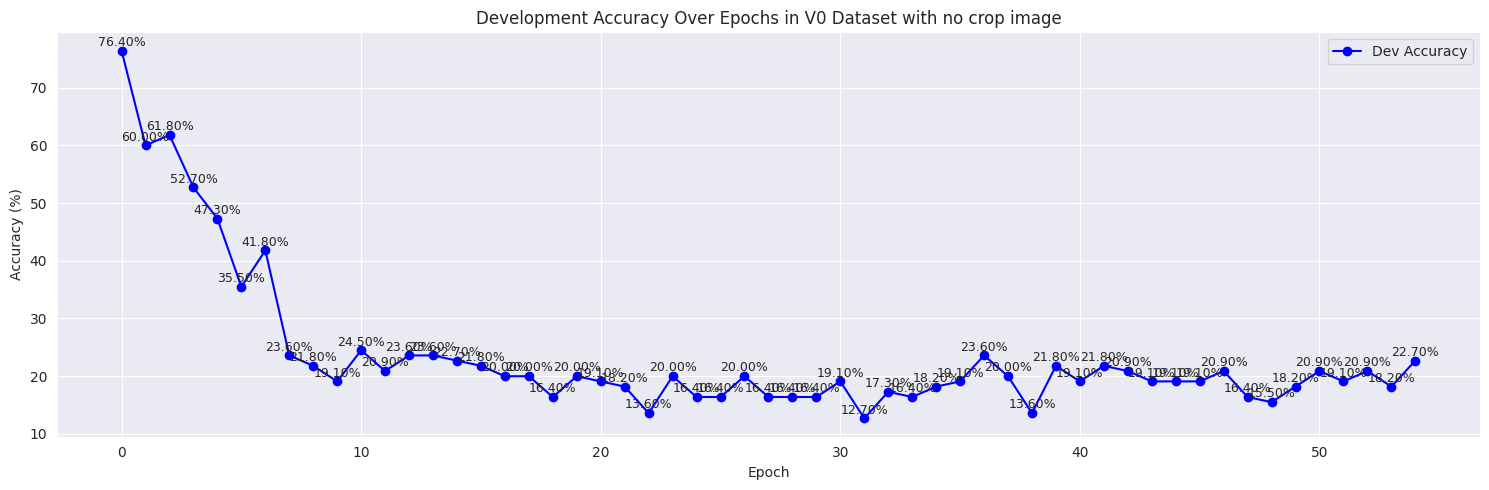

In [9]:
import re
import matplotlib.pyplot as plt

# Path to your log file
log_path = "/home/martinvalentine/Desktop/CSLR-VSL/outputs/logs/baseline_res18/dev.txt"

# Lists to store epoch numbers and accuracy values
epochs = []
accuracies = []

# Read and parse the file
with open(log_path, 'r') as f:
    for line in f:
        match = re.search(r"Epoch (\d+), dev\s+([\d.]+)%", line)
        if match:
            epoch = int(match.group(1))
            acc = float(match.group(2))
            epochs.append(epoch)
            accuracies.append(acc)

# Plotting
plt.figure(figsize=(15, 5))
plt.plot(epochs, accuracies, marker='o', linestyle='-', color='b', label='Dev Accuracy')

# Annotate each point with its value
for epoch, acc in zip(epochs, accuracies):
    plt.text(epoch, acc + 0.3, f"{acc:.2f}%", ha='center', va='bottom', fontsize=9)

plt.title("Development Accuracy Over Epochs in V0 Dataset with no crop image")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


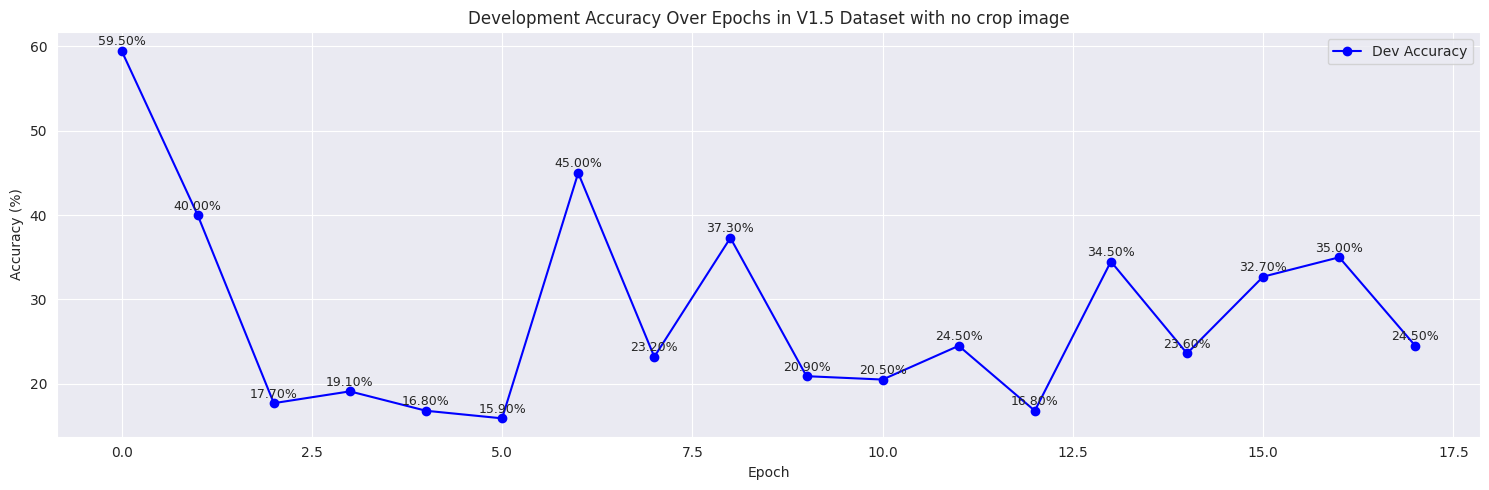

In [4]:
import re
import matplotlib.pyplot as plt

# Path to your log file
log_path = "/home/martinvalentine/Desktop/CSLR-VSL/outputs/logs/baseline_res18/dev.txt"

# Lists to store epoch numbers and accuracy values
epochs = []
accuracies = []

# Read and parse the file
with open(log_path, 'r') as f:
    for line in f:
        match = re.search(r"Epoch (\d+), dev\s+([\d.]+)%", line)
        if match:
            epoch = int(match.group(1))
            acc = float(match.group(2))
            epochs.append(epoch)
            accuracies.append(acc)

# Plotting
plt.figure(figsize=(15, 5))
plt.plot(epochs, accuracies, marker='o', linestyle='-', color='b', label='Dev Accuracy')

# Annotate each point with its value
for epoch, acc in zip(epochs, accuracies):
    plt.text(epoch, acc + 0.3, f"{acc:.2f}%", ha='center', va='bottom', fontsize=9)

plt.title("Development Accuracy Over Epochs in V1.5 Dataset with no crop image")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
